In [291]:
import datetime as dt
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from arch import arch_model
import pandas_ta as ta

## Load SRTG.JK data with yfinance

In [292]:
yf.pdr_override()
df = pdr.get_data_yahoo(["BBCA.JK"])

[*********************100%***********************]  1 of 1 completed


In [293]:
df.ta.strategy()

131it [00:05, 26.19it/s]


In [294]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'ABER_ZG_5_15',
       'ABER_SG_5_15', 'ABER_XG_5_15', 'ABER_ATR_5_15',
       ...
       'VIDYA_14', 'VTXP_14', 'VTXM_14', 'VWAP_D', 'VWMA_10', 'WCP',
       'WILLR_14', 'WMA_10', 'ZL_EMA_10', 'ZS_30'],
      dtype='object', length=224)

In [295]:
df

,Open,High,Low,Close,Adj Close,Volume,ABER_ZG_5_15,ABER_SG_5_15,ABER_XG_5_15,ABER_ATR_5_15,...,VIDYA_14,VTXP_14,VTXM_14,VWAP_D,VWMA_10,WCP,WILLR_14,WMA_10,ZL_EMA_10,ZS_30
Date,,,,,,,,,,,,,,,,,,,,,
2004-06-08,175.0,180.0,175.0,177.5,103.276199,499150000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,177.500000,NaN,177.500,NaN,NaN,NaN,NaN
2004-06-09,177.5,182.5,175.0,180.0,104.730804,294290000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,179.166667,NaN,179.375,NaN,NaN,NaN,NaN
2004-06-10,180.0,180.0,177.5,180.0,104.730804,165590000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,179.166667,NaN,179.375,NaN,NaN,NaN,NaN
2004-06-11,177.5,180.0,177.5,180.0,104.730804,135830000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,179.166667,NaN,179.375,NaN,NaN,NaN,NaN
2004-06-14,180.0,180.0,175.0,177.5,103.276199,158540000,178.500000,NaN,NaN,NaN,...,NaN,NaN,NaN,177.500000,NaN,177.500,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-22,10000.0,10125.0,9950.0,10100.0,9872.500000,91968200,10138.333333,10309.266996,9967.399671,170.933662,...,9735.896909,0.981132,0.896226,10058.333333,10137.930135,10068.750,-46.153846,10140.454545,10131.924363,0.896703
2024-03-25,10075.0,10075.0,9925.0,10075.0,10075.000000,66971000,10105.000000,10276.204751,9933.795249,171.204751,...,9744.939658,0.981481,0.879630,10025.000000,10135.075964,10037.500,-50.000000,10128.181818,10103.392660,0.713956
2024-03-26,10050.0,10050.0,9950.0,10050.0,10050.000000,65742700,10070.000000,10238.124435,9901.875565,168.124435,...,9755.108336,1.000000,0.845455,10016.666667,10127.232422,10025.000,-56.000000,10112.272727,10080.048540,0.517269


In [296]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

In [297]:
df = df.dropna(axis=1)
df = df.drop(['Open','High','Low','Adj Close'],axis=1)

In [298]:
feature_train = df.loc["2020-1-1":"2022-12-31"]

In [299]:
from sklearn.preprocessing import MinMaxScaler


feature_train_X = feature_train.iloc[:-1,1:]
feature_train_X = feature_train_X.select_dtypes(include=['float'])
# scaler_X = MinMaxScaler().fit(feature_train_X)
# X_train = scaler_X.transform(feature_train_X)
# scaled_X = pd.DataFrame(X_train,columns = feature_train_X.columns,index=feature_train_X.index)
# scaled_X

In [300]:
feature_train_Y = feature_train.Close.iloc[1:]

In [301]:
lr = LinearRegression(copy_X= True, fit_intercept = True, n_jobs= None, positive=False)
sfs = SequentialFeatureSelector(lr)
X = feature_train_X
y = feature_train_Y

sfs.fit(X,y)

SequentialFeatureSelector(estimator=LinearRegression())

In [302]:
selected_features_mask = sfs.get_support()

# Print the selected features
selected_features = np.where(selected_features_mask)[0]
print("Selected Features:", selected_features)

Selected Features: [ 3  4  7  8  9 17 18 21 24 25 26 27 28 29 30 32]


In [303]:
X_train_selected = sfs.transform(feature_train_X)

In [304]:
reg = lr.fit(X_train_selected,feature_train_Y)

In [305]:
# print("intercept : ",reg.intercept_)
# for i in range(len(reg.coef_)):
#      print(reg.feature_names_in_[i],":",reg.coef_[i])

In [306]:
print(reg.coef_.shape)

(16,)


# Test df

In [307]:
X_test = df.loc["2023-1-1":].iloc[:,1:]
X_test = X_test.select_dtypes(include=['float'])
# X_test1 = scaler_X.transform(X_test)
# scaled_Xtest = pd.DataFrame(X_test1,columns = X_test.columns,index=X_test.index)
# scaled_Xtest

In [308]:
y_test = df.loc["2023-1-1":].Close.iloc[1:]
# y_test1 = y_test.values.reshape(-1,1)

# Y_test = scaler_Y.transform(y_test1)
# scaled_Y = pd.DataFrame(Y_test,index=y_test.index,columns=['scaled_Y'])
# scaled_Y

In [309]:
X_test_selected = sfs.transform(X_test.values)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SequentialFeatureSelector was fitted with feature names
  warnings.warn(


In [310]:
y_test

Date
2023-01-03     8550.0
2023-01-04     8350.0
2023-01-05     8250.0
2023-01-06     8300.0
2023-01-09     8450.0
               ...   
2024-03-22    10100.0
2024-03-25    10075.0
2024-03-26    10050.0
2024-03-27    10075.0
2024-03-28    10075.0
Name: Close, Length: 296, dtype: float64

In [311]:
from sklearn.metrics import mean_squared_error
import sklearn.metrics as metricsk
y_pred = reg.predict(X_test_selected)
ypred_index = []
for i in range(1,len(X_test.index)):
    ypred_index.append(X_test.index[i])

#ypred_index = ypred_index.append(ypred_index[-1]+dt.timedelta(1))
# for i in X_test.index:
#     if i.day_name() == "Friday":
#         ypred_index.append(i+ pd.DateOffset(days=3))
#     else:
#         ypred_index.append(i+ pd.DateOffset(days=1))
one_day = ypred_index[-1]+dt.timedelta(1)
ypred_index = np.append(ypred_index,one_day)
len(ypred_index)

297

In [312]:
# y_pred = model1.inverse_transform(y_pred)
# ypred_flatten = y_pred.flatten()

In [328]:
y_pred_df = pd.DataFrame({'y_pred': y_pred,"y_real":y_test}, index=ypred_index)  #X_test.index + pd.DateOffset(days=1))

In [329]:
y_pred_df

,y_pred,y_real
2023-01-03,8542.0,8550.0
2023-01-04,8566.0,8350.0
2023-01-05,8374.0,8250.0
2023-01-06,8240.0,8300.0
2023-01-09,8302.0,8450.0
...,...,...
2024-03-25,10088.0,10075.0
2024-03-26,10048.0,10050.0
2024-03-27,10032.0,10075.0
2024-03-28,10060.0,10075.0


In [330]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred_df.iloc[:-1,0])
print("Mean Squared Error:", mse)
mae = metricsk.mean_absolute_error(y_test,y_pred_df.iloc[:-1,0])
print("mean absolute error:",mae)

Mean Squared Error: 8936.131756756757
mean absolute error: 71.00337837837837


## Plotting the prediction result

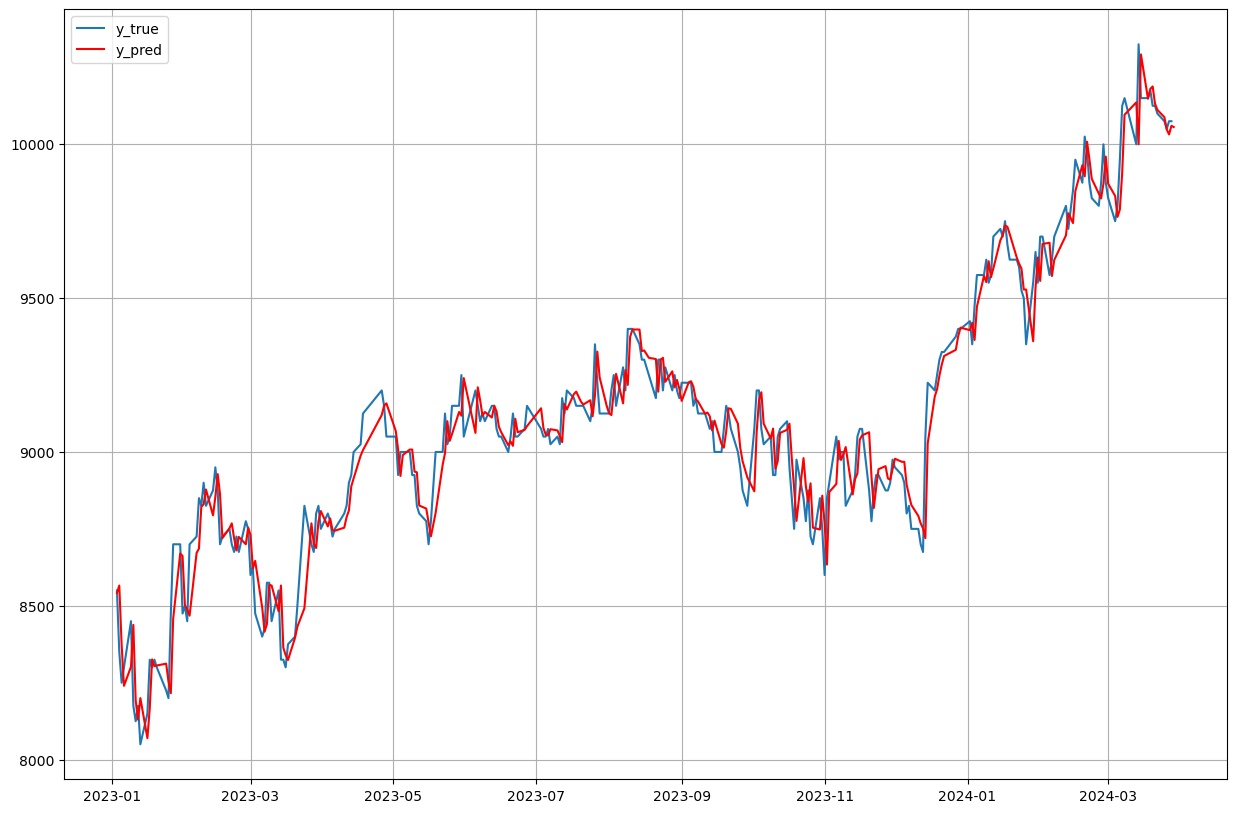

In [331]:
plt.figure(figsize=(15,10))
plt.plot(y_test,label='y_true')
plt.plot(y_pred_df['y_pred'],color="r",label='y_pred')
plt.grid()
plt.legend()
plt.show()

In [332]:
print(y_pred_df.index[-2],"price is",y_pred_df['y_pred'][-2],"w/ range between",y_pred_df['y_pred'][-2] - mae,"-",y_pred_df['y_pred'][-2] + mae)

2024-03-28 00:00:00 price is 10060.0 w/ range between 9988.996621621622 - 10131.003378378378


In [333]:
print(y_pred_df.index[-1],"price is",y_pred_df['y_pred'][-1],"w/ range between",y_pred_df['y_pred'][-1] - mae,"-",y_pred_df['y_pred'][-1] + mae)

2024-03-29 00:00:00 price is 10056.0 w/ range between 9984.996621621622 - 10127.003378378378


In [334]:
y_pred_df.tail(5)

,y_pred,y_real
2024-03-25,10088.0,10075.0
2024-03-26,10048.0,10050.0
2024-03-27,10032.0,10075.0
2024-03-28,10060.0,10075.0
2024-03-29,10056.0,NaN


# Upper Limit and Lower Limit Using MAE. mae1=74.76560729930566

In [335]:
def round_to_multiple(number, multiple):
    return multiple * round(number / multiple)

In [336]:
print(y_pred_df['y_pred'][-1])
print(mae)

10056.0
71.00337837837837


In [337]:
round_to_multiple(y_pred_df['y_pred'][-1],25)

10050

In [338]:
print(y_pred_df['y_pred'][-1] - mae)
print(round_to_multiple(y_pred_df['y_pred'][-1] - mae,25))

9984.996621621622
9975


In [339]:
print(y_pred_df['y_pred'][-1] + mae)
print(round_to_multiple(y_pred_df['y_pred'][-1] + mae,25))

10127.003378378378
10125


## Residuals Check

In [340]:
y_pred_df['y_real'] = y_test
y_pred_df['residuals'] = y_pred_df['y_real'] - y_pred_df['y_pred']
y_pred_df[:-1]

,y_pred,y_real,residuals
2023-01-03,8542.0,8550.0,8.0
2023-01-04,8566.0,8350.0,-216.0
2023-01-05,8374.0,8250.0,-124.0
2023-01-06,8240.0,8300.0,60.0
2023-01-09,8302.0,8450.0,148.0
...,...,...,...
2024-03-22,10112.0,10100.0,-12.0
2024-03-25,10088.0,10075.0,-13.0
2024-03-26,10048.0,10050.0,2.0
2024-03-27,10032.0,10075.0,43.0


(array([ 3., 12., 28., 78., 80., 51., 26., 10.,  5.,  3.]),
 array([-263. , -203.4, -143.8,  -84.2,  -24.6,   35. ,   94.6,  154.2,
         213.8,  273.4,  333. ]),
 <BarContainer object of 10 artists>)

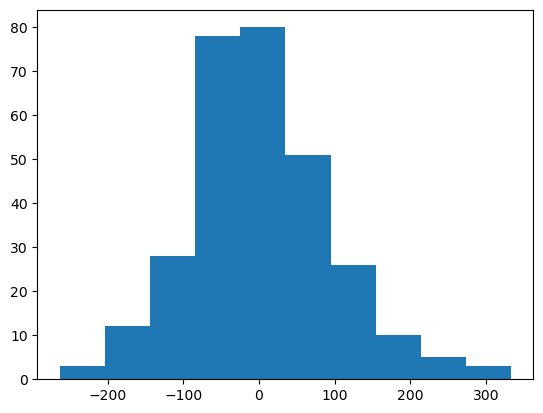

In [341]:
plt.hist(y_pred_df['residuals'])

In [342]:
y_pred_df.residuals.sum()

329.0